In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>


1. Pelvic_incidence: angle between a line perpendicular to the sacral plate at its midpoint and a line connecting this point to the femoral head axis.
2. Pelvic tilt: is a position-dependent parameter defined as the angle created by a line running from the sacral endplate midpoint to the center of the bifemoral heads and the vertical axis
3. Lumbar_lordosis_angle: is defined by the angle between the upper plane of the L1 lumbar vertebrae and the upper plane of the S1 sacral vertebrae.
4. Sacral_slope: is defined as the angle between the horizontal and the sacral plate, and is a critical spinal parameter in the analysis of sagittal balance.
5. Pelvic_radius: The distance from the hip axis to the posterior-superior corner of the S1 endplate
6. Degree_spondylolisthesis: spondylolisthesis is a forward slip of one vertebra. Spondylolisthesis usually occurs towards the base of your spine in the lumbar area. The degree of spondylolisthesis describes the severity of vertebral body slipped forward.
7. Pelvic_slope: is the angle between a vertical line and the CS segment
8. Direct_tilt: *No Information*
9. Thoracic_slope: thoracic  angle between T1 slope and neck tilt
10. Cervical_tilt:n angle formed between the vertical line from the center of T1UEP and the line from the center of T1UEP to the center of the C2 vertebra
11. Sacrum_angle: is the angle formed by the true conjugate with the two pieces of the sacrum.
12. Scoliosis_slope: Scoliosis is a sideways curvature of the spine it represents the angle formed from the curvature of the spine
13. Status:- Normal or Abnormal


In [2]:
data = pd.read_csv("backpain.csv")


<IPython.core.display.Javascript object>

In [3]:
data.sample(30)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
121,83.879941,23.077427,87.141512,60.802514,124.646072,80.555605,0.436933,7.2994,11.1917,16.28150,-8.553212,24.8562,Abnormal
16,63.834982,20.362507,54.552434,43.472475,112.309491,-0.622527,0.560675,10.7690,16.8116,11.41344,2.676002,17.3859,Abnormal
208,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,0.574775,23.8665,13.0473,9.41012,5.212541,28.6308,Abnormal
226,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,0.134954,31.7659,10.9570,13.32169,-9.939014,31.3141,Normal
88,56.605771,16.800200,42.000000,39.805571,127.294522,24.018575,0.793169,19.5456,8.7779,16.40308,-35.287375,31.6243,Abnormal
163,115.923261,37.515436,76.800000,78.407825,104.698603,81.198927,0.542816,22.3317,8.8519,11.48960,-6.754004,32.5082,Abnormal
53,30.149936,11.917445,34.000000,18.232491,112.684141,11.463223,0.659772,12.0969,10.7071,16.18484,-4.763914,26.8917,Abnormal
291,51.079833,14.209935,35.951229,36.869898,115.803711,6.905090,0.705726,24.1378,12.6652,13.92353,-3.478546,28.7425,Normal
29,66.879211,24.891999,49.278597,41.987212,113.477018,-2.005892,0.677268,12.4271,8.2495,7.58784,-3.963385,27.3587,Abnormal
254,72.955644,19.576971,61.007071,53.378673,111.234047,0.813491,0.409586,25.4781,12.4063,7.05411,-9.046640,16.8122,Normal


<IPython.core.display.Javascript object>

In [4]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<IPython.core.display.Javascript object>

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


<IPython.core.display.Javascript object>

In [7]:
data["Status"].replace("Abnormal", "1", inplace=True)
data["Status"].replace("Normal", "0", inplace=True)
data["Status"] = data["Status"].map({"1": 1, "0": 0}).astype(int)

<IPython.core.display.Javascript object>

In [8]:
data.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
Status                      0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
X = data.drop(["Status"], axis=1)
y = data["Status"]

<IPython.core.display.Javascript object>

In [10]:
X = pd.get_dummies(X, drop_first=True)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64

<IPython.core.display.Javascript object>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

# y_test = y_test.map({"1": 1, "0": 0}).astype(int)

Number of rows in train data = 217
Number of rows in test data = 93


<IPython.core.display.Javascript object>

In [12]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

print(
    "{0:0.2f}% data is in training set".format((len(X_train) / len(data.index)) * 100)
)
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data.index)) * 100))

Percentage of classes in training set:
1    0.663594
0    0.336406
Name: Status, dtype: float64
Percentage of classes in test set:
1    0.709677
0    0.290323
Name: Status, dtype: float64
70.00% data is in training set
30.00% data is in test set


<IPython.core.display.Javascript object>

In [13]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [14]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [15]:
model = DecisionTreeClassifier(criterion="gini", random_state=1,)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

<IPython.core.display.Javascript object>

In [17]:
predictions = model.predict(X_test)

<IPython.core.display.Javascript object>

In [18]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66        27
           1       0.88      0.79      0.83        66

    accuracy                           0.77        93
   macro avg       0.73      0.76      0.74        93
weighted avg       0.80      0.77      0.78        93



<IPython.core.display.Javascript object>

In [19]:
print(confusion_matrix(y_test, predictions))

[[20  7]
 [14 52]]


<IPython.core.display.Javascript object>

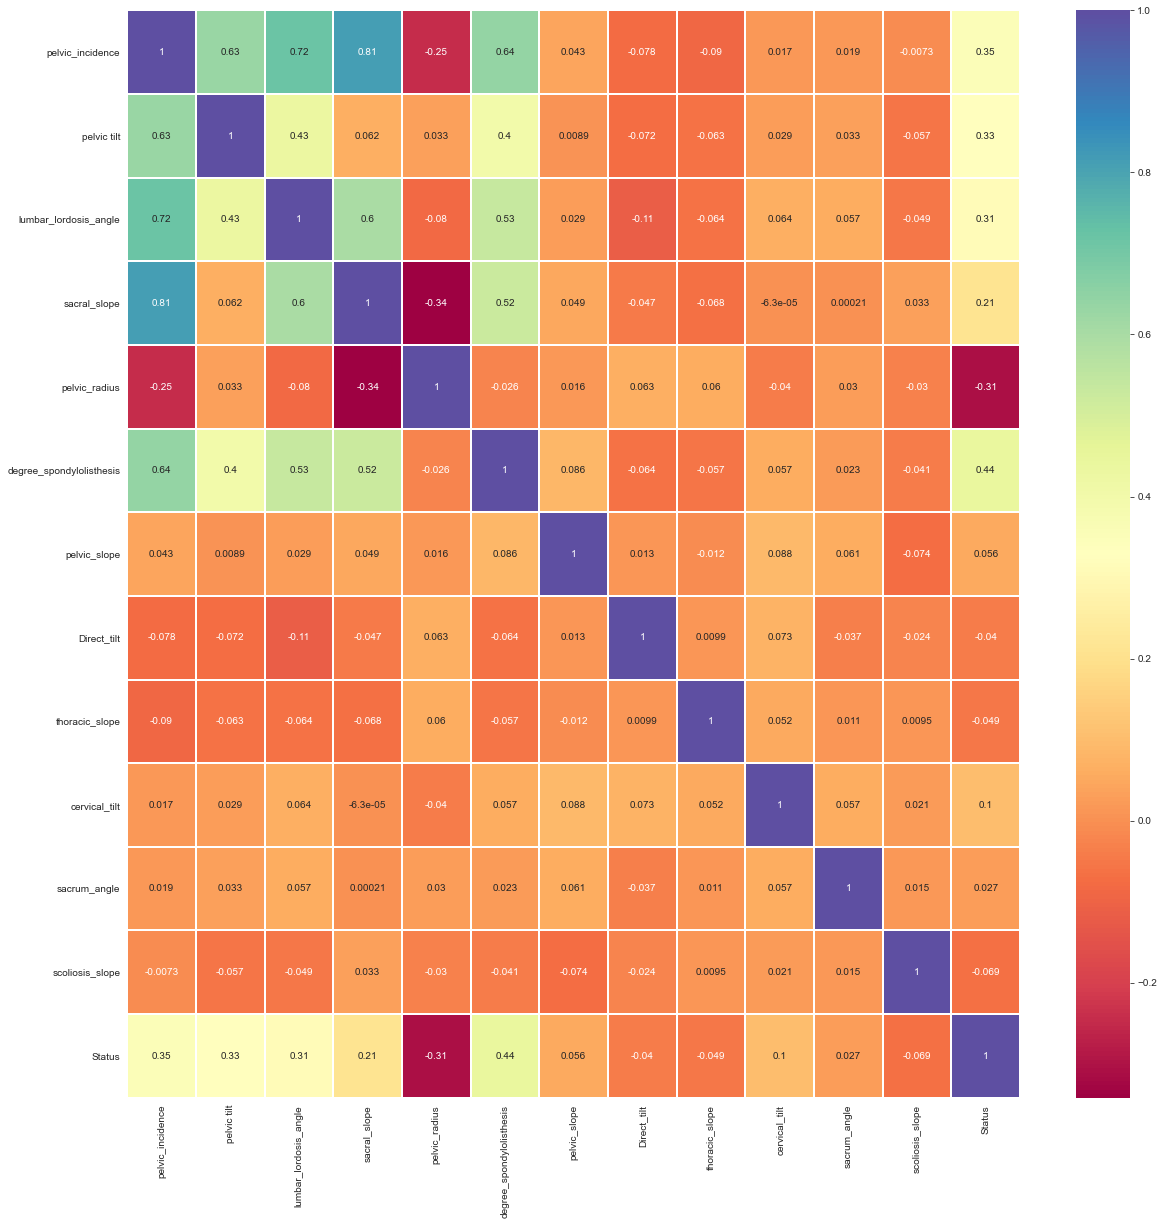

<IPython.core.display.Javascript object>

In [20]:
# Generate Corelation chart and understand how these features are related
def generate_matrix_chart(data):
    """
    Generate corelation chart(heat-map) between all numerial features 
    """
    sns.set_style("darkgrid")
    plt.figure(figsize=(20, 20))
    sns.heatmap(
        data.corr(), cmap="Spectral", linecolor="white", linewidths=1, annot=True
    )


generate_matrix_chart(data)

In [21]:
data.corr().T

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
pelvic_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.043290,-0.078411,-0.089740,0.016750,0.019240,-0.007251,0.353336
pelvic tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.008852,-0.072119,-0.063394,0.028931,0.032859,-0.056550,0.326063
lumbar_lordosis_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.029486,-0.112939,-0.063582,0.063875,0.057199,-0.049054,0.312484
sacral_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.048988,-0.046914,-0.067968,-0.000063,0.000207,0.032853,0.210602
pelvic_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,0.015767,0.063433,0.060477,-0.039800,0.029738,-0.030145,-0.309857
degree_spondylolisthesis,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.085925,-0.063812,-0.057286,0.056576,0.023021,-0.041023,0.443687
pelvic_slope,0.043290,0.008852,0.029486,0.048988,0.015767,0.085925,1.000000,0.012694,-0.011770,0.088017,0.060743,-0.073893,0.055865
Direct_tilt,-0.078411,-0.072119,-0.112939,-0.046914,0.063433,-0.063812,0.012694,1.000000,0.009887,0.072738,-0.037428,-0.024021,-0.039591
thoracic_slope,-0.089740,-0.063394,-0.063582,-0.067968,0.060477,-0.057286,-0.011770,0.009887,1.000000,0.052451,0.011354,0.009541,-0.049354
cervical_tilt,0.016750,0.028931,0.063875,-0.000063,-0.039800,0.056576,0.088017,0.072738,0.052451,1.000000,0.057451,0.021243,0.100044


<IPython.core.display.Javascript object>

In [59]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

# predict on test
y_predict = model.predict(X_test)
# predict on training
predictions = model.predict(X_train)


coef_df = pd.DataFrame(model.coef_)
coef_df["intercept"] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0  0.014534  0.085079 -0.020201 -0.070545 -0.089799  0.140103  0.809894   

          7         8        9        10        11  intercept  
0 -0.010797  0.013921  0.14101  0.006773 -0.014293   9.921752  


<IPython.core.display.Javascript object>

In [60]:
model_score = model.score(X_test, y_test)
print(model_score)

0.8924731182795699


<IPython.core.display.Javascript object>

In [61]:
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [62]:
# print(classification_report(y_train, predictions))
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.843318,0.875,0.887324,0.881119


<IPython.core.display.Javascript object>

In [26]:
y_predict = model.predict(X_test)

<IPython.core.display.Javascript object>

In [27]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.94      0.91      0.92        66

    accuracy                           0.89        93
   macro avg       0.87      0.88      0.87        93
weighted avg       0.90      0.89      0.89        93



<IPython.core.display.Javascript object>

In [28]:
from sklearn.model_selection import GridSearchCV

<IPython.core.display.Javascript object>

In [29]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       random_state=1)

<IPython.core.display.Javascript object>

In [46]:
for i in range(1, 9, 1):
    print(f"\n\nMax Depth : {i}")
    model = DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=i)
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    print(classification_report(y_train, predictions))
    coef_df = pd.DataFrame(model.feature_importances_)
    coef_df.columns = ["value"]
    print(coef_df)
    print("\n\n sorted results")
    print(coef_df.sort_values(by="value", ascending=False))



Max Depth : 1
              precision    recall  f1-score   support

           0       0.61      0.96      0.74        73
           1       0.97      0.69      0.80       144

    accuracy                           0.78       217
   macro avg       0.79      0.82      0.77       217
weighted avg       0.85      0.78      0.78       217

    value
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     1.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0


 sorted results
    value
5     1.0
0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0


Max Depth : 2
              precision    recall  f1-score   support

           0       0.77      0.74      0.76        73
           1       0.87      0.89      0.88       144

    accuracy                           0.84       217
   macro avg       0.82      0.81      0.82       217
weighted avg       0.84      0.84      0.84       217

       value
0   0.000000
1   0.0000

<IPython.core.display.Javascript object>

In [31]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["gini","entropy"],
    "splitter": ["best", "random"],
    #"min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1,
                       splitter='random')

<IPython.core.display.Javascript object>

In [47]:
estimator.max_depth

10

<IPython.core.display.Javascript object>

In [48]:
estimator.criterion

'entropy'

<IPython.core.display.Javascript object>

In [49]:
estimator.splitter

'random'

<IPython.core.display.Javascript object>

In [35]:
from sklearn.metrics import classification_report

<IPython.core.display.Javascript object>

In [50]:
# predict on test
y_predict = estimator.predict(X_test)

<IPython.core.display.Javascript object>

In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57        27
           1       0.83      0.80      0.82        66

    accuracy                           0.74        93
   macro avg       0.69      0.70      0.69        93
weighted avg       0.75      0.74      0.74        93



<IPython.core.display.Javascript object>

In [52]:
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)
y_predict_default = dTree.predict(X_test)

<IPython.core.display.Javascript object>

In [53]:
# print(classification_report(y_test, y_predict_default))
print(classification_report(y_test, y_predict_default))

              precision    recall  f1-score   support

           0       0.59      0.74      0.66        27
           1       0.88      0.79      0.83        66

    accuracy                           0.77        93
   macro avg       0.73      0.76      0.74        93
weighted avg       0.80      0.77      0.78        93



<IPython.core.display.Javascript object>

In [54]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [41]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.004224,0.008449
2,0.004558,0.017564
3,0.005672,0.034579
4,0.005907,0.052300
5,0.006144,0.058445
6,0.007562,0.066007
7,0.007680,0.073688
8,0.007900,0.081587
9,0.008980,0.090568


<IPython.core.display.Javascript object>

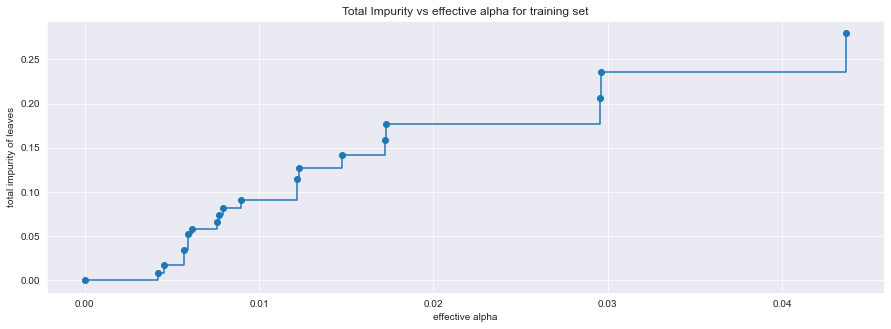

<IPython.core.display.Javascript object>

In [42]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


<IPython.core.display.Javascript object>

In [44]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    print(f"{clf},{values_train}")
    recall_train.append(values_train)

DecisionTreeClassifier(random_state=1),1.0
DecisionTreeClassifier(ccp_alpha=0.004224270353302612, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.004557654327239579, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.005671747607231476, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.005907077471186985, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.006144393241167435, random_state=1),0.9861111111111112
DecisionTreeClassifier(ccp_alpha=0.007562330142975311, random_state=1),0.9861111111111112
DecisionTreeClassifier(ccp_alpha=0.007680491551459296, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.007899934167215275, random_state=1),0.9930555555555556
DecisionTreeClassifier(ccp_alpha=0.008980267044783167, random_state=1),0.9861111111111112
DecisionTreeClassifier(ccp_alpha=0.012193600903278331, random_state=1),0.9652777777777778
DecisionTreeClassifier(ccp_alpha=0.01228878648233487, ran

<IPython.core.display.Javascript object>

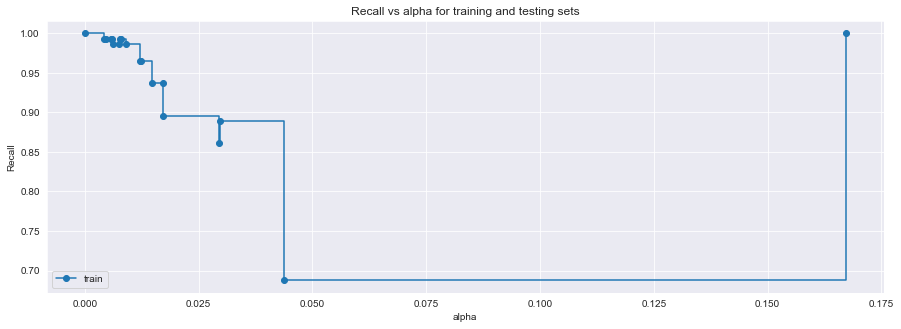

<IPython.core.display.Javascript object>

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
# ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [55]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    dTree, X_test, y_test
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.774194,0.787879,0.881356,0.832


<IPython.core.display.Javascript object>

In [56]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.741935,0.80303,0.828125,0.815385


<IPython.core.display.Javascript object>